# <a href="https://mipt-stats.gitlab.io/courses/mathstat_bmhf.html">Математическая статистика (ФБМФ, ФМХФ)</a>
## Домашнее задание 1 &mdash; часть B

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются **вообще никак**, кроме случаев наличия уважительной причины.
* До дедлайна можно поменять решение любое количество раз. Начинайте точно так же сдавать задание, бот подскажет.
* Любую уважительную причину нужно подтвердить документально, отправив скан или фото боту. При этом работу можно сдать позже на столько дней, на сколько время ее действия пересекается с временем выполнения задания.
* **По задаче 4** необходимо отправить **фото** в хорошем качестве (почерк, масштаб, освещенность, ориентация и т.д.). Фото плохого качества могут быть проигнорированы. 
* **По задачам 5, 6** необходимо отправить **ноутбук в формате `ipynb` с выполненным кодом**.
* Выполнять задание необходимо **полностью самостоятельно**. При обнаружении списывания **все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Простой или основной уровень вы выбираете самостоятельно, выполняя или не выполняя задания типа B. При выборе **простого уровня** достаточно выполнить задания *типа A*. При выборе **основного уровня** нужно выполнять *как задания типа A, так и задания типа B*.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек. Ячейки с assert'ами **удалять и изменять нельзя**, в противном случае соответствующее задание не будет оценено.
* Комментарии к решению пишите в markdown-ячейках.
* Никакой код из данного задания при проверке запускаться не будет. **Если код студента не выполнен, недописан и т.д., то он не оценивается.**
* Каждая задача стоит **5 баллов**.

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from scipy.special import factorial, gammaln

### Задача 4

Оценку $\theta$ из задания 1.1 и оценку $a$ из задания 1.2 проверьте на несмещённость и состоятельность

__________________
### Задача 5

Загрузите данные об экспрессии гена FAM129A из файла `FAM129A.txt` с помощью функции `np.loadtxt`. Постройте гистограмму функцией `plt.hist`, указав в параметре `bins` оптимальное количество разбиений.

(0.0, 15500.0)

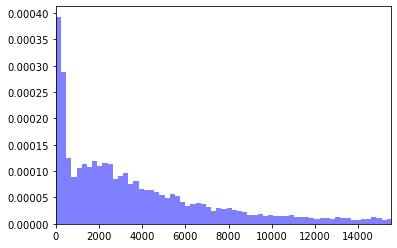

In [123]:
x = np.loadtxt('FAM129A.txt')
num_bins = 1000 
n, bins, patches = plt.hist(x, num_bins, density=True, facecolor='blue', alpha=0.5)
plt.xlim(0, 15500)

В предположении, что данные имеют пуассоновское распределение, найдите оценку максимального правдоподобия параметра распределения. Нарисуйте график дискретной плотности полученного распределения и сравните его с гистограммой. Хорошо ли оценка распределения приближает данные?

(0.0, 11300.0)

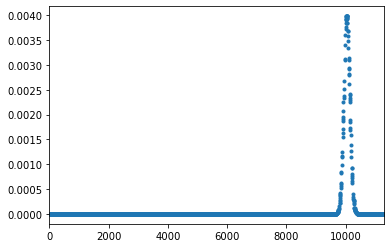

In [122]:
theta = x.mean() #оценка max правдоподобия
y = sps.poisson(theta).pmf(x)
plt.scatter(x, y, marker='.')
plt.xlim(0, 11300)

**Вывод:** Функция распределения, в отличие от гистограммы, имеет характерный максимум в окрестности x = 10000, гистограмма же имеет характерный максимум в окрестности x = 0. Следовательно, оценка распределения плохо приближает данные.

__________________
### Задача 6
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим оценки 
* $2\overline{X}$, 
* $(n+1) \min_i X_i$,
* $\min_i X_i + \max_i X_i$,
* $\frac{n+1}{n} \max_i X_i$. 

Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом $0.01$ сгенерируйте $5000$ независимых выборок $X^1=\left(X^1_1, \dots, X^1_{100} \right), \dots, X^{5000} = \left(X^{5000}_1, \dots, X^{5000}_{100} \right)$ из распределения $U[0, \theta]$.

Рассмотрим одну из перечисленных выше оценок $\widehat{\theta}$. Посчитайте ее значение по каждой выборке. Тем самым, для данного $\theta$ получится $5000$ реализаций этой оценки $\widehat{\theta}_1, ..., \widehat{\theta}_{5000}$, где значение $\widehat{\theta}_j$ посчитано по реализации выборки $X^j$.

Теперь можно оценить функцию риска этой оценки с помощью усреднения
$$\widehat{R}_{\widehat{\theta}}(\theta) = \frac{1}{5000}\sum\limits_{j=1}^{5000} L\left(\widehat{\theta}_j, \theta\right),$$
где $L$ &mdash; одна из двух функций потерь: квадратичная $L(x, y)=(x-y)^2$ и линейная $L(x, y)=\left|x-y\right|$.

Для каждого из типов функций потерь постройте свой график. Нанесите на этот график для каждой из четырех оценок $\widehat{\theta}$ оценку функции потерь $\widehat{R}_{\widehat{\theta}}(\theta)$, пользуясь шаблоном ниже. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

*Совет*: при тестировании кода запускайте его с небольшими размерами данных. Например, используйте 100 реализаций выборок. Финальные результаты получите, поставив требуемые значения размеров данных.

В задаче доспустимо использовать короткие циклы, то есть с малым количествои итераций.

**Решение:**

In [404]:
theta = np.arange(0.01, 2.01, 0.01)
n = 5000 #количество выборок
k = 100 #объем выборки
x = [0] * len(theta)
for j in range(len(theta)):
    x[j] = sps.uniform(scale=theta[j]).rvs((n, k))
x = np.array(x)

In [410]:
estimators = [ 
    2 * x.mean(axis=2), # theta_0
    (k + 1) * x.min(axis=2) , # theta_1
    x.min(axis=2) + x.max(axis=2) , # theta_2
    (k + 1) / k * np.max(x, axis=2) # theta_3
]
estimators = np.array(estimators)

In [406]:
#квадратичная функция потерь
theta_transformed = np.broadcast_to(theta, (n, 200)).transpose()
R_square = [0] * len(estimators)
for i in range(len(estimators)):
    R_square[i] = 1 / n * ((estimators[i] - theta_transformed) ** 2).sum(axis=1)
R_square = np.array(R_square)

In [407]:
#линейная функция потерь
R_linear = [0] * len(estimators)
for i in range(len(estimators)):
    R_linear[i] = 1 / n * (abs(estimators[i] - theta_transformed)).sum(axis=1)
R_linear = np.array(R_linear)

(0.0, 0.001)

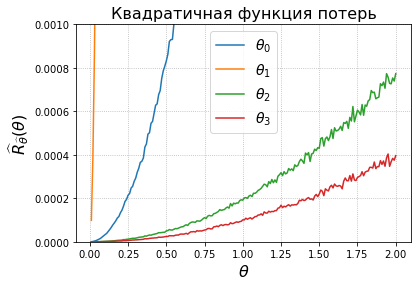

In [408]:
for i in range(len(estimators)):
    plt.plot(theta, R_square[i], label=f'$\\theta_{i}$')  # для каждой оценки
plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}_{\\widehat{\\theta}}(\\theta)$', fontsize=16)
plt.legend(fontsize=14)
plt.title('Квадратичная функция потерь', fontsize=16)
plt.ylim((0, 0.001))

(0.0, 0.1)

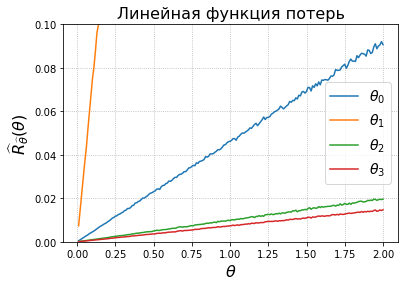

In [409]:
for i in range(len(estimators)):
    plt.plot(theta, R_linear[i], label=f'$\\theta_{i}$')  # для каждой оценки
plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}_{\\widehat{\\theta}}(\\theta)$', fontsize=16)
plt.legend(fontsize=14)
plt.title('Линейная функция потерь', fontsize=16)
plt.ylim((0, 0.1))

Сделайте вывод о том, какая оценка лучше и в каком подходе.

**Вывод:** И при интегральном, и при минимаксном подходе лучшая оценка -- $\theta_3$
